# Approach for Time-Series Data
   
   1.Load the data and libraries

   2.Data Preparation
   
   3.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!unzip "/content/165899276823660ec2379f8793842aa5b168a_.zip"

unzip:  cannot find or open /content/165899276823660ec2379f8793842aa5b168a_.zip, /content/165899276823660ec2379f8793842aa5b168a_.zip.zip or /content/165899276823660ec2379f8793842aa5b168a_.zip.ZIP.


In [ ]:
data = pd.read_csv('Super_Store.csv',encoding='latin')

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
cols_select = ['Row ID', 'Order ID',  'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

In [ ]:
data_sales = data.drop(cols_select,axis=1)

In [ ]:
data_sales.head()

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840


In [ ]:
data_sales = data_sales.sort_values('Order Date')

In [ ]:
print(data_sales['Order Date'].min())
print(data_sales['Order Date'].max())

1/1/2017
9/9/2017


In [ ]:
#data_sales = data_sales.set_index('Order Date')

In [ ]:
data_sales

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940
...,...,...
1524,9/9/2017,66.112
1152,9/9/2017,243.920
251,9/9/2017,17.024
250,9/9/2017,141.372


In [ ]:
data_sales['Order Date'] =pd.to_datetime(data_sales['Order Date'])
data_sales.set_index('Order Date',inplace=True)
data_sales = data_sales['Sales'].resample('MS').mean()

In [ ]:
data_sales

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

<Axes: xlabel='Order Date'>

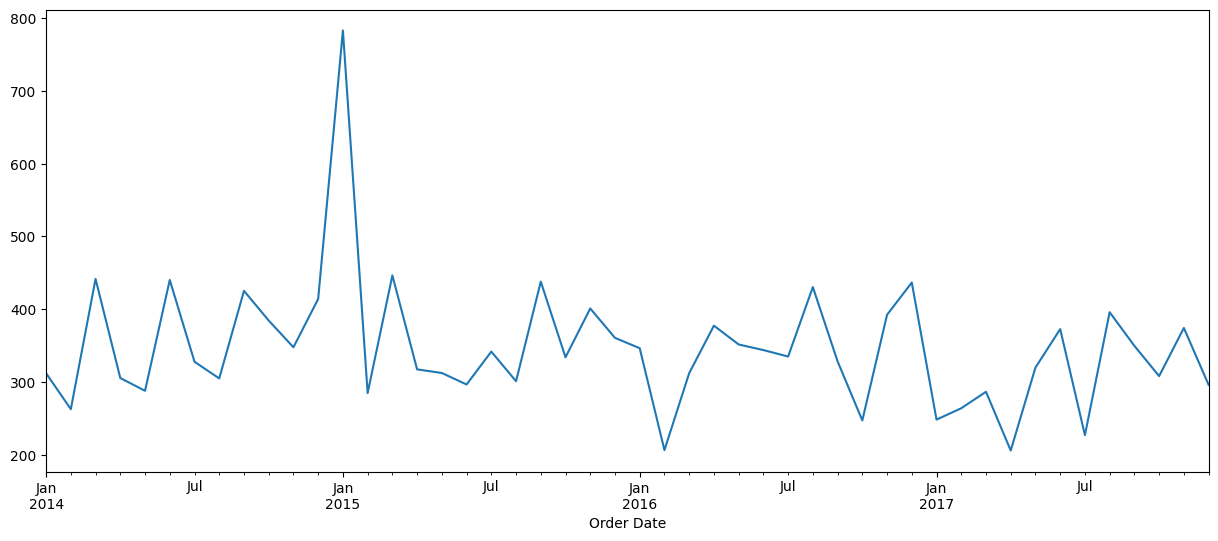

In [ ]:
data_sales.plot(figsize=(15,6))

Seasonal Decompose

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
series = data_sales
result = seasonal_decompose(series, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Order Date
2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01    374.193980
2014-08-01    394.721952
2014-09-01    395.843644
2014-10-01    396.537833
2014-11-01    398.052013
2014-12-01    393.092036
2015-01-01    387.693906
2015-02-01    388.116466
2015-03-01    388.482340
2015-04-01    386.905447
2015-05-01    387.021881
2015-06-01    387.013984
2015-07-01    366.614267
2015-08-01    345.176367
2015-09-01    336.320775
2015-10-01    333.230934
2015-11-01    337.362959
2015-12-01    340.962498
2016-01-01    342.649705
2016-02-01    347.753039
2016-03-01    348.579497
2016-04-01    340.406881
2016-05-01    336.432430
2016-06-01    339.235603
2016-07-01    338.316789
2016-08-01    336.629079
2016-09-01    337.959488
2016-10-01    329.751323
2016-11-01    321.288243
2016-12-01    321.166778
2017-01-01    317.868371
2017-02-01    311.933890
2017-03-01    311.382148
2017-04-01    

PLOT

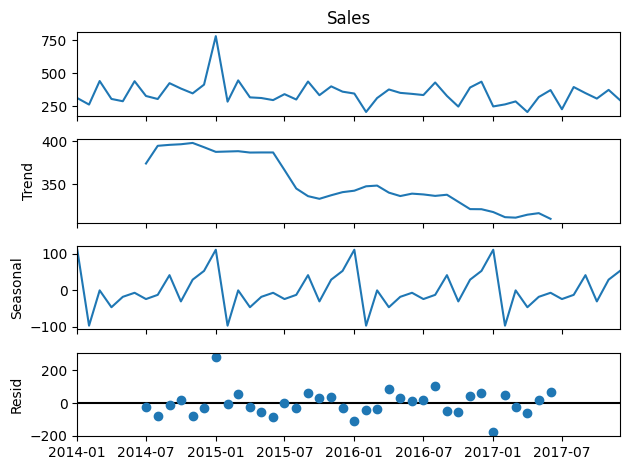

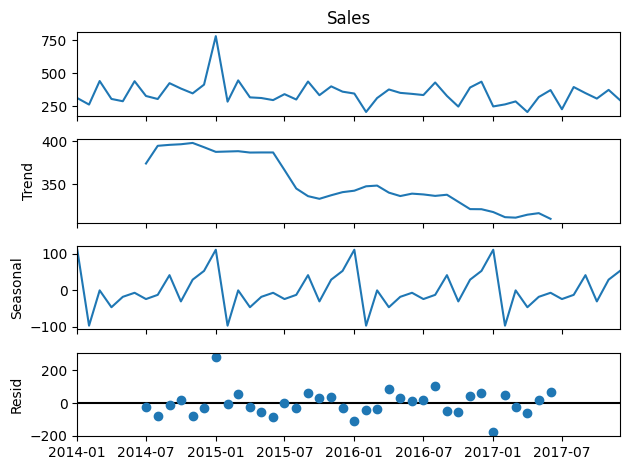

In [ ]:
result.plot()

Augumented Dickey Fuller Test



*  Null Hypothesis : Data is non stationary
*  Alternate Hypothesis : Data is stationary



In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adf_test = adfuller(data_sales)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')


ADF Statistic: -6.962405221214863
p-value: 9.09339851000658e-10


Auto correlation plot

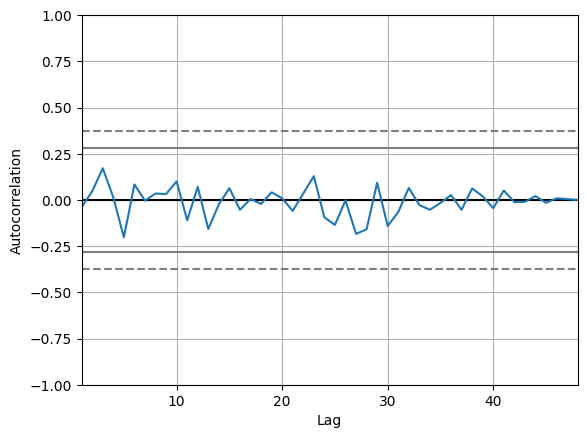

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_sales)
plt.show()

<Axes: xlabel='Order Date'>

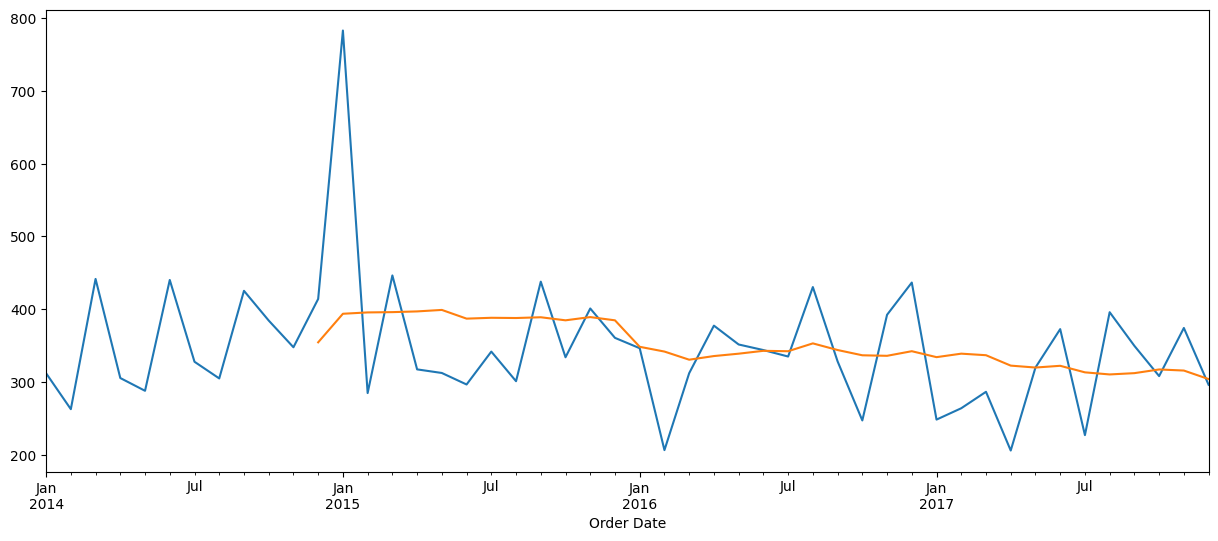

In [ ]:
#moving average

data_sales_MA = data_sales.rolling(window=12).mean()
data_sales.plot(figsize=(15,6))
data_sales_MA.plot()

2018-01-01    327.218973
Freq: MS, dtype: float64


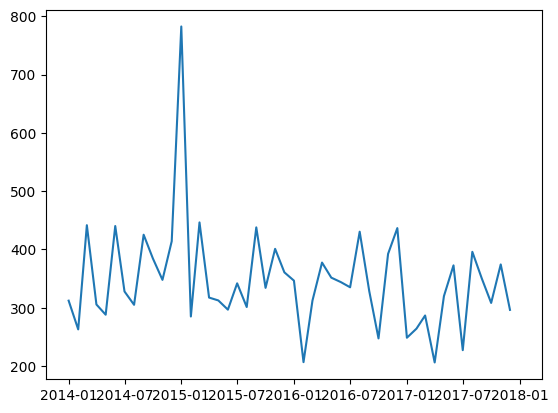

In [ ]:
#exponential smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing,Holt,SimpleExpSmoothing

#simple exponential smoothing
#fit model
model = SimpleExpSmoothing(data_sales)

#forecast
model_fit = model.fit()

#make predictiion
yhat = model_fit.predict(len(data_sales),len(data_sales))
print(yhat)

#plot
plt.plot(data_sales)
plt.plot(yhat,color='red')
plt.show()

2018-01-01    370.132397
Freq: MS, dtype: float64


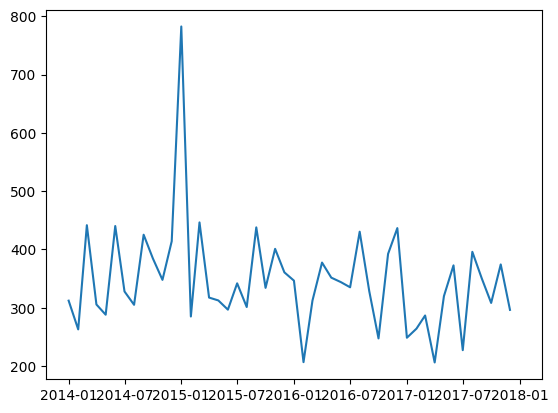

In [ ]:
#holt winter's Exponential smoothing

model = ExponentialSmoothing(data_sales,seasonal='add',trend='add',seasonal_periods=12)
model_fit = model.fit()
yhat = model_fit.predict(len(data_sales),len(data_sales))
print(yhat)
plt.plot(data_sales)
plt.plot(yhat,color='red')

In [ ]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(data_sales,order=(0,2,2))
result = model.fit()

In [ ]:
best_aic, best_order = float('inf'), None
for p in range(0, 6):
    for d in range(0, 4):
        for q in range(0, 6):
          try:
            result = sm.tsa.statespace.SARIMAX(data_sales,order =(p,d,q)).fit()
            if result.aic < best_aic:
              best_aic = result.aic
              best_order = (p,d,q)
          except:
            continue


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

In [ ]:
print(f"Best AIC: {best_aic}")
print(f"Best Order: {best_order}")

Best AIC: 562.1740921323561
Best Order: (0, 2, 2)


In [ ]:
forecast = result.predict(start='2014-01-01',end = '2018-12-01')
print(forecast)

2014-01-01      0.000000
2014-02-01    628.470764
2014-03-01    146.339405
2014-04-01    725.150397
2014-05-01    254.629980
2014-06-01    214.005782
2014-07-01    407.635405
2014-08-01    320.896321
2014-09-01    342.919470
2014-10-01    387.197775
2014-11-01    346.130688
2014-12-01    420.587781
2015-01-01    410.142607
2015-02-01    601.826388
2015-03-01    580.204924
2015-04-01    520.895007
2015-05-01    355.348834
2015-06-01    265.794686
2015-07-01    298.055119
2015-08-01    259.787903
2015-09-01    241.623794
2015-10-01    370.146664
2015-11-01    314.217419
2015-12-01    350.503796
2016-01-01    402.835524
2016-02-01    287.617232
2016-03-01    301.337822
2016-04-01    266.376625
2016-05-01    227.777730
2016-06-01    344.506301
2016-07-01    344.381808
2016-08-01    294.938028
2016-09-01    388.804827
2016-10-01    330.932271
2016-11-01    309.392047
2016-12-01    345.499387
2017-01-01    313.480746
2017-02-01    342.869899
2017-03-01    349.384095
2017-04-01    213.037906


In [ ]:
data_sales

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

RMSE Calculation

In [ ]:
actual= data_sales
predicted = forecast['2014-01-01':'2017-12-01']

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(actual,predicted))
print(rmse)

147.38667995367803


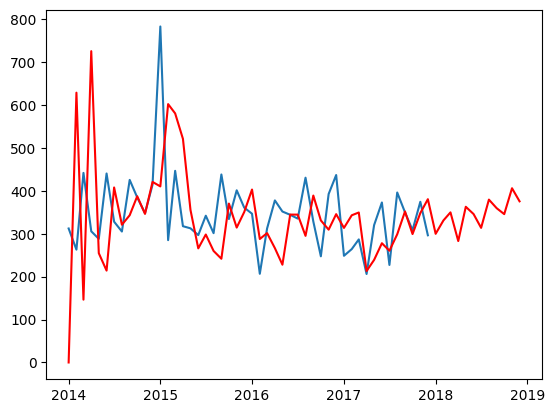

In [ ]:
plt.plot(data_sales)
plt.plot(forecast,color='red')
plt.show()

prophet

In [ ]:
from prophet import Prophet

In [ ]:
data = pd.read_csv('Super_Store.csv',encoding='latin')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [ ]:
cols_select = ['Row ID', 'Order ID',  'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

In [ ]:
data = data.drop(cols_select,axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  2121 non-null   object 
 1   Sales       2121 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.3+ KB


In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data = data.sort_values('Order Date')
data = data.set_index('Order Date')

In [ ]:
data.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940


In [ ]:
data = data['Sales'].resample('MS').mean()

In [ ]:
data = data.reset_index().rename(columns={'Order Date':'ds', 'Sales':'y'})

model = Prophet()
model.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqjstytab/qmarn0qx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqjstytab/eb3ivyxr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34117', 'data', 'file=/tmp/tmpqjstytab/qmarn0qx.json', 'init=/tmp/tmpqjstytab/eb3ivyxr.json', 'output', 'file=/tmp/tmpqjstytab/prophet_modelh_jzhnmc/prophet_model-20240726025255.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:52:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
408,2018-11-27
409,2018-11-28
410,2018-11-29
411,2018-11-30
412,2018-12-01


In [ ]:
# Python
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
408,2018-11-27,275.560207,-252.840300,-88.575172,275.560149,275.560258,-449.767795,-449.767795,-449.767795,-449.767795,-449.767795,-449.767795,0.0,0.0,0.0,-174.207588
409,2018-11-28,275.505613,-163.121336,0.335016,275.505555,275.505664,-357.694772,-357.694772,-357.694772,-357.694772,-357.694772,-357.694772,0.0,0.0,0.0,-82.189159
410,2018-11-29,275.451019,-54.712716,112.917010,275.450961,275.451071,-245.751603,-245.751603,-245.751603,-245.751603,-245.751603,-245.751603,0.0,0.0,0.0,29.699416
411,2018-11-30,275.396425,80.205140,243.567487,275.396367,275.396477,-115.310409,-115.310409,-115.310409,-115.310409,-115.310409,-115.310409,0.0,0.0,0.0,160.086017
412,2018-12-01,275.341832,227.915316,391.398645,275.341773,275.341884,31.815959,31.815959,31.815959,31.815959,31.815959,31.815959,0.0,0.0,0.0,307.157790


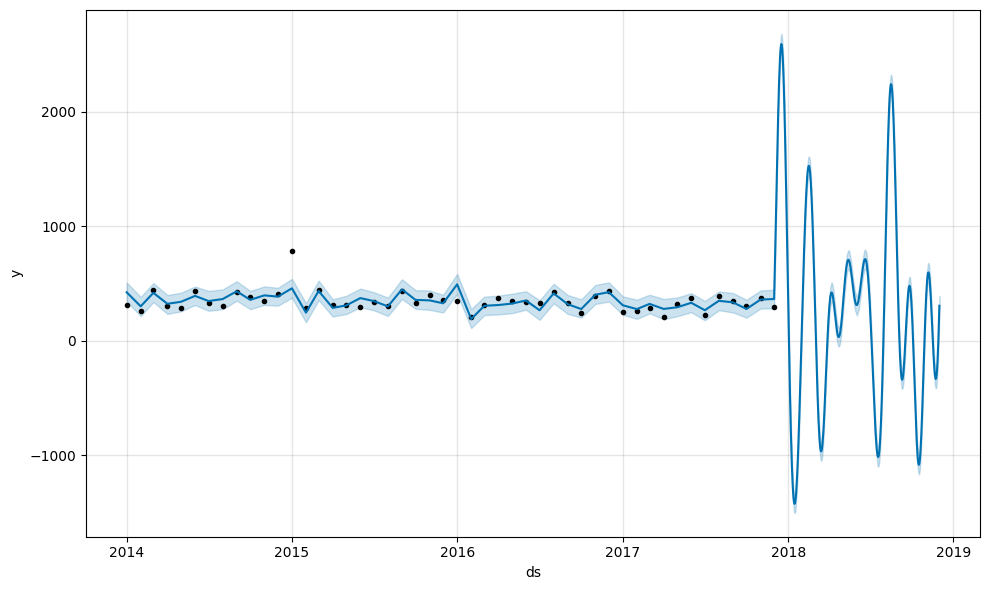

In [ ]:
# Python
fig1 = model.plot(forecast)